# CS 4104 - Data Analytics

## Practical 02 - Linear Regression

## Assignment 01
### Name: Nimna Alupotha Gamage - Index No.: s14682 - Reg No.: 2019s17241 - Faculty: Science

Linear Regression using Gradient descent algorithm.

### Import libraries

In [2]:
# pandas
import pandas as pd

# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

%matplotlib inline

# sklearn
from sklearn.preprocessing import StandardScaler

### Import dataset

In [3]:
df_original=pd.read_csv("insurance.csv")
df_original.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Get a copy and continue to use it

In [4]:
df=df_original.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Get information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Descibe the data

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check if the dataset has null values

In [7]:
df.isnull().values.any()

False

### Binary encoding

In [8]:
dummies = pd.get_dummies(df[['sex',"smoker","region"]])
dummies.drop(labels=['sex_female', 'smoker_no'], axis=1,inplace=True)
df=pd.concat([df,dummies],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


### Drop original columns

In [9]:
df.drop(labels=['sex','smoker','region','region_northwest'],axis=1,inplace=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,0
4,32,28.880,0,3866.85520,1,0,0,0,0


### Rename columns as previous

In [10]:
df.rename(columns={"sex_male":"sex","smoker_yes":"smoker"},inplace=True)

In [11]:
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,0
4,32,28.880,0,3866.85520,1,0,0,0,0


### Convert numerical data 

In [12]:
age=np.array(df["age"])
age=age/age.max()
bmi=np.array(df["bmi"])
bmi=bmi/bmi.max()

In [13]:
df["age"]=age
df["bmi"]=bmi
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_southeast,region_southwest
0,0.296875,0.525127,0,16884.92400,0,1,0,0,1
1,0.281250,0.635611,1,1725.55230,1,0,0,1,0
2,0.437500,0.621118,3,4449.46200,1,0,0,1,0
3,0.515625,0.427348,0,21984.47061,1,0,0,0,0
4,0.500000,0.543572,0,3866.85520,1,0,0,0,0


In [14]:
col=list(df.columns)
col.remove("charges")

In [15]:
x=df[col]
y=df["charges"]

In [16]:
x

,age,bmi,children,sex,smoker,region_northeast,region_southeast,region_southwest
0,0.296875,0.525127,0,0,1,0,0,1
1,0.281250,0.635611,1,1,0,0,1,0
2,0.437500,0.621118,3,1,0,0,1,0
3,0.515625,0.427348,0,1,0,0,0,0
4,0.500000,0.543572,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1333,0.781250,0.582910,3,1,0,0,0,0
1334,0.281250,0.600791,0,0,0,1,0,0
1335,0.281250,0.693582,0,0,0,0,1,0
1336,0.328125,0.485601,0,0,0,0,0,1


In [17]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Split the dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
y_train

1306    16115.30450
124     10115.00885
588     13635.63790
1127     5836.52040
201      8871.15170
           ...     
802      2103.08000
53      37742.57570
350     11830.60720
79       6571.02435
792      2731.91220
Name: charges, Length: 1070, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

In [22]:
r2*100

79.46968492150816

(array([ 24.,  20., 131.,  39.,  26.,  19.,   3.,   3.,   1.,   2.]),
 array([-10878.58230884,  -7199.86204193,  -3521.14177501,    157.57849191,
          3836.29875883,   7515.01902574,  11193.73929266,  14872.45955958,
         18551.1798265 ,  22229.90009341,  25908.62036033]),
 <BarContainer object of 10 artists>)

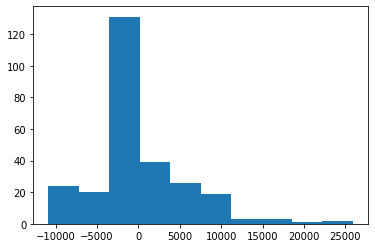

In [23]:
reduals=np.array((y_test)-(y_pred))
plt.hist(reduals)

<function matplotlib.pyplot.show(close=None, block=None)>

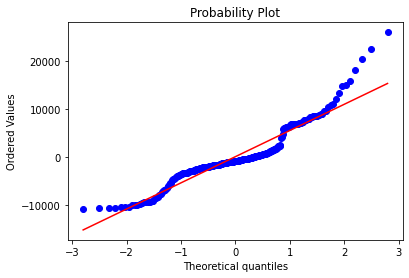

In [24]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(reduals, plot=plt)
plt.show